In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Analisando o Dataframe

In [ ]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [ ]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [ ]:
# Criando a nova coluna de idade
def calcular_idade_2022(row):
    if row['ANO_INGRESSO_2022'] == 2020:
        return row['IDADE_ALUNO_2020'] + 2
    elif row['ANO_INGRESSO_2022'] == 2021:
        return row['IDADE_ALUNO_2021'] + 1
    else:
        return np.nan  # Ou outro valor padrão para outros anos

df['IDADE_ALUNO_2022'] = df.apply(calcular_idade_2022, axis=1)

In [ ]:
def get_categorical_columns(df):
  my_object_list = []
  for column in df.dtypes.index:
    _type = df.dtypes[column]
    if _type == 'object': my_object_list.append(column)
  print(my_object_list)
  return my_object_list

In [ ]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(18, 16))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

In [ ]:
def apply_label_encoding(df, categorical_columns: list):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    df_encoded = df.copy()
    le = LabelEncoder()
    for column in categorical_columns:
        df_encoded[column] = le.fit_transform(df_encoded[column])
    return df_encoded

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datathon/data/PEDE_PASSOS_DATASET_FIAP.csv', sep = ';')

In [ ]:
df.head(10)

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,NaN,ALUNO-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,NaN,ALUNO-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,7.656250,Promovido de Fase + Bolsa,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Não,Não,7.625002,5.0,Fase 6 (2º EM)
8,NaN,ALUNO-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.750000,Mantido na Fase atual,Mantido na Fase atual,NaN,NaN,Não,Não,5.500010,10.0,ALFA (2º e 3º ano)
9,Escola Pública,ALUNO-10,13,1,3B,Não,5.1618745,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail(10)

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1339,NaN,ALUNO-1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.34375,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.916663,2.5,Fase 8 (Universitários)
1340,Rede Decisão/União,ALUNO-1341,17,1,7B,Sim,8.430002833333335,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,NaN,ALUNO-1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.25000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
1342,Escola Pública,ALUNO-1343,11,2,2M,Não,5.841667000000001,D,Quartzo,Seu destaque em 2020: A sua boa entrega das li...,...,6.25000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.444443,5.0,Fase 4 (9º ano)
1343,Escola Pública,ALUNO-1344,14,2,1R,Não,6.449445333333334,C,Ágata,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,NaN,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,NaN,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.62500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano)
1346,Escola Pública,ALUNO-1347,17,1,7B,Não,7.158543333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,Escola Pública,ALUNO-1348,13,2,3R,Sim,7.842224333333333,B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.71875,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM)
1348,NaN,ALUNO-1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.50000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Mantido na Fase + Bolsa,Sim,Não,5.999993,5.0,Fase 5 (1º EM)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [ ]:
# PADRONIZAÇÃO DO INFORMAÇÃO DE TURMA.
df['FASE_2020'] = df.FASE_TURMA_2020.str[0]
df['TURMA_2020'] = df.FASE_TURMA_2020.str[1]
df = df.drop('FASE_TURMA_2020', axis=1)

In [ ]:
#Apagando dado de instituição que parece estar errado
df = df.drop(1258)

In [ ]:
#Verificando os valores nulos
print(df.isnull().sum())

INSTITUICAO_ENSINO_ALUNO_2020    621
NOME                               0
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
PONTO_VIRADA_2020                647
                                ... 
IPV_2022                         486
IAN_2022                         486
NIVEL_IDEAL_2022                 486
FASE_2020                        621
TURMA_2020                       621
Length: 70, dtype: int64


In [ ]:
#Imprime os valores únicos de cada coluna de um DataFrame.
for coluna in df.select_dtypes(exclude=['float64']).columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df[coluna].unique())
    print()


Valores únicos da coluna 'INSTITUICAO_ENSINO_ALUNO_2020':
['Escola Pública' nan 'Rede Decisão/União' 'Einstein' 'Estácio' 'UNISA'
 'FIAP' 'Escola João Paulo II']

Valores únicos da coluna 'NOME':
['ALUNO-1' 'ALUNO-2' 'ALUNO-3' ... 'ALUNO-1347' 'ALUNO-1348' 'ALUNO-1349']

Valores únicos da coluna 'IDADE_ALUNO_2020':
['11' nan '12' '10' '14' '13' '8' '7' '18' '9' '15' '17' '16' '19' '20']

Valores únicos da coluna 'ANOS_PM_2020':
['2' nan '1' '3' '0' '4']

Valores únicos da coluna 'PONTO_VIRADA_2020':
['Não' nan 'Sim']

Valores únicos da coluna 'INDE_2020':
['7.883752' nan '7.856389666666666' '5.076252' '8.077085'
 '8.381390666666666' '5.1618745' '9.712504000000001' '5.838887333333334'
 '6.434585' '5.162502' '7.766252' '7.2055576666666665' '9.354725666666667'
 '7.125001' '7.013888333333334' '7.698890666666667' '6.64396'
 '8.307780333333334' '6.6788913333333335' '8.131388333333334' '7.460002'
 '7.8052090000000005' '6.218335' '6.631252' '6.966669' '8.955835'
 '8.181112666666667' '8.6966679

In [ ]:
# algumas colunas com tipo errado, convertendo para float
df['INDE_2021'] = df['INDE_2021'].astype('float64')

ValueError: could not convert string to float: '#NULO!'

In [ ]:
#PROCURANDO pelo valor nulo do df
colunas_com_nulos = df.columns[(df == '#NULO!').any()]
print(colunas_com_nulos)

Index(['PEDRA_2021', 'INDE_2021', 'PONTO_VIRADA_2021'], dtype='object')


In [ ]:
#subsituindo nulo por Nan
df = df.replace('#NULO!', np.nan)

In [ ]:
#PROCURANDO pelo valor nulo do df
colunas_com_nulos = df.columns[(df == '#NULO!').any()]
print(colunas_com_nulos)

In [ ]:
# convertendo todas as colunas para float
df['INDE_2021'] = df['INDE_2021'].astype('float64')
df['INDE_2020'] = df['INDE_2020'].astype('float64')
df['IEG_2020'] = df['IEG_2020'].astype('float64')
df['IPS_2020'] = df['IPS_2020'].astype('float64')
df['IDA_2020'] = df['IDA_2020'].astype('float64')
df['IPP_2020'] = df['IPP_2020'].astype('float64')
df['IPV_2020'] = df['IPV_2020'].astype('float64')
df['IAA_2020'] = df['IAA_2020'].astype('float64')
df['IAN_2020'] = df['IAN_2020'].astype('float64')

df['IDADE_ALUNO_2020'] = df['IDADE_ALUNO_2020'].astype('float64')

df['ANOS_PM_2020'] = df['ANOS_PM_2020'].astype('float64')

In [ ]:
#checando novamente valores unicos
#Imprime os valores únicos de cada coluna de um DataFrame.
for coluna in df.select_dtypes(exclude=['float64']).columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df[coluna].unique())
    print()

Valores únicos da coluna 'INSTITUICAO_ENSINO_ALUNO_2020':
['Escola Pública' nan 'Rede Decisão/União' 'Einstein' 'Estácio' 'UNISA'
 'FIAP' 'Escola João Paulo II']

Valores únicos da coluna 'NOME':
['ALUNO-1' 'ALUNO-2' 'ALUNO-3' ... 'ALUNO-1347' 'ALUNO-1348' 'ALUNO-1349']

Valores únicos da coluna 'PONTO_VIRADA_2020':
['Não' nan 'Sim']

Valores únicos da coluna 'INDE_CONCEITO_2020':
['B' nan 'D' 'A' 'C']

Valores únicos da coluna 'PEDRA_2020':
['Ametista' nan 'Quartzo' 'Topázio' 'Ágata']

Valores únicos da coluna 'DESTAQUE_IEG_2020':
['Seu destaque em 2020: A sua boa entrega das lições de casa.' nan
 'Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.'
 'Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.'
 'Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado.']

Valores únicos da coluna 'DESTAQUE_IDA_2020':
['Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.' nan
 'Seu destaque em 2020: As suas boas notas na

In [ ]:
df.info()

In [ ]:
#tentando corrigir a idade de cada aluno
import numpy as np
# Criando a nova coluna usando np.where
df['IDADE_ALUNO_2021'] = np.where(df['SINALIZADOR_INGRESSANTE_2021'] == 'Veterano',
                               df['IDADE_ALUNO_2020'] + 1,
                               np.nan)

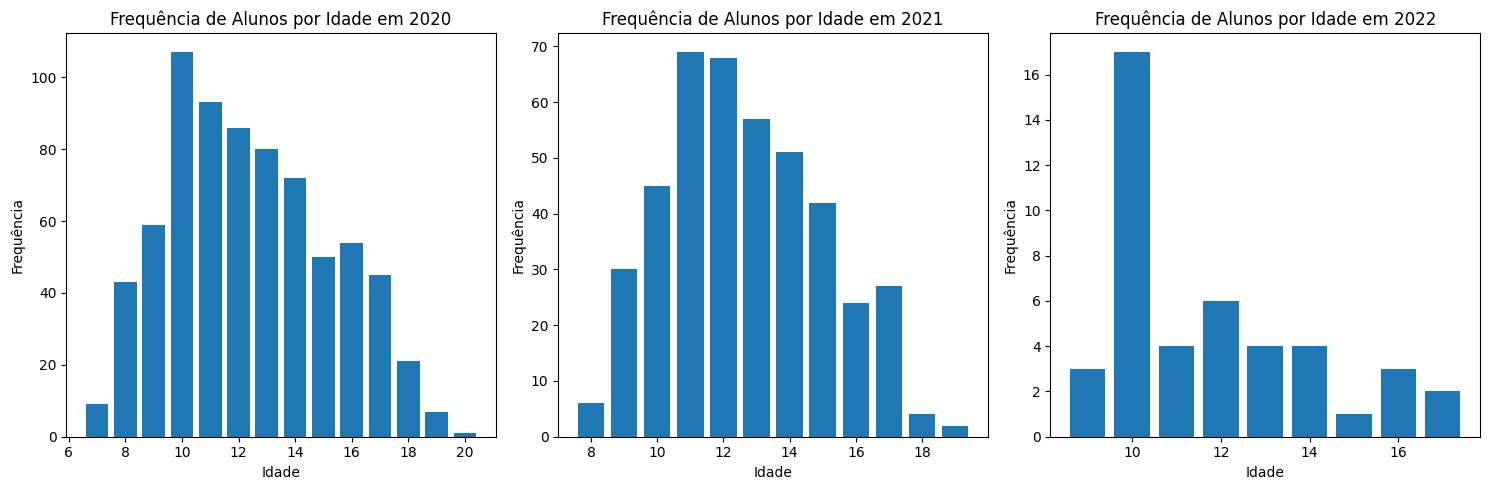

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que você tenha um DataFrame chamado 'df' com as colunas 'IDADE_ALUNO_2020', 'IDADE_ALUNO_2021' e 'IDADE_ALUNO_2022'

# Criando uma lista com os nomes das colunas
colunas_idade = ['IDADE_ALUNO_2020', 'IDADE_ALUNO_2021', 'IDADE_ALUNO_2022']

# Criando uma figura com 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterando sobre as colunas e criando os gráficos
for i, coluna in enumerate(colunas_idade):
    # Filtrando os valores não nulos e diferentes de zero
    dados_filtrados = df[coluna][df[coluna] != 0]

    # Contando a frequência de cada idade
    contagem_idades = dados_filtrados.value_counts().sort_index()

    # Plotando o gráfico de barras
    axes[i].bar(contagem_idades.index, contagem_idades.values)
    axes[i].set_xlabel('Idade')
    axes[i].set_ylabel('Frequência')
    axes[i].set_title(f'Frequência de Alunos por Idade em {coluna[-4:]}')


# Ajustando o layout dos gráficos
plt.tight_layout()
plt.show()

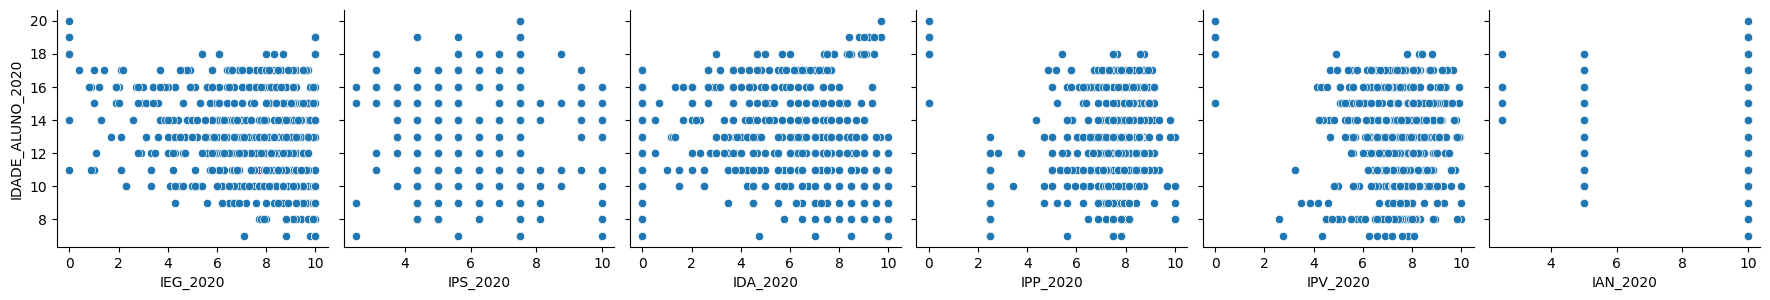

                  IEG_2020  IPS_2020  IDA_2020  IPP_2020  IPV_2020  IAN_2020  \
IEG_2020          1.000000  0.151417  0.474303  0.110303  0.349243  0.026132   
IPS_2020          0.151417  1.000000  0.181929  0.222570  0.154160  0.065301   
IDA_2020          0.474303  0.181929  1.000000 -0.125259  0.036559  0.055534   
IPP_2020          0.110303  0.222570 -0.125259  1.000000  0.769857 -0.062271   
IPV_2020          0.349243  0.154160  0.036559  0.769857  1.000000 -0.101854   
IAN_2020          0.026132  0.065301  0.055534 -0.062271 -0.101854  1.000000   
IDADE_ALUNO_2020 -0.371890 -0.107967 -0.243558 -0.081826 -0.292254 -0.069402   

                  IDADE_ALUNO_2020  
IEG_2020                 -0.371890  
IPS_2020                 -0.107967  
IDA_2020                 -0.243558  
IPP_2020                 -0.081826  
IPV_2020                 -0.292254  
IAN_2020                 -0.069402  
IDADE_ALUNO_2020          1.000000  


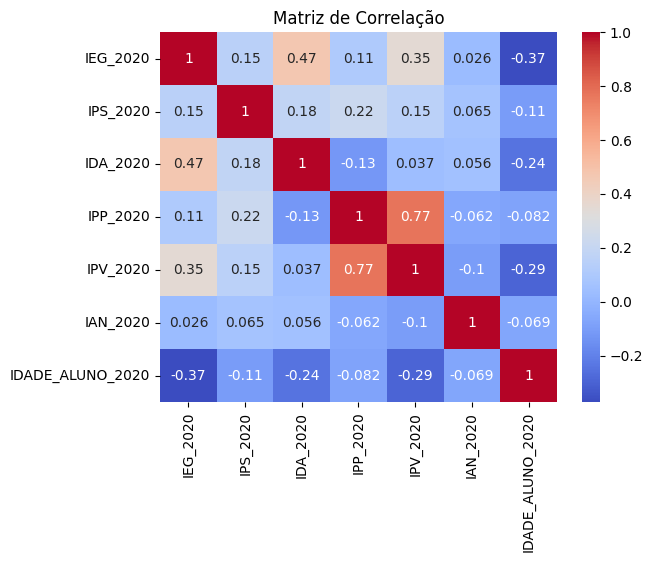

In [ ]:
#tentando verificar desempenho por idade

# Criando um gráfico de pares para visualizar a relação entre todas as variáveis numéricas
sns.pairplot(df, x_vars=["IEG_2020", "IPS_2020", "IDA_2020", "IPP_2020", "IPV_2020", "IAN_2020"], y_vars="IDADE_ALUNO_2020", height=3)
plt.show()

# Selecionando as colunas desejadas e criando um novo DataFrame
df_temp = df[['IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'IDADE_ALUNO_2020']]

# Calculando a matriz de correlação
correlation_matrix = df_temp.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)
# Criando um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
#divisao do df por anos.

In [ ]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020 = cleaning_dataset(df_2020)
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2020,TURMA_2020
0,Escola Pública,ALUNO-1,11.0,2.0,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2,H
2,Escola Pública,ALUNO-3,12.0,2.0,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,3,H
3,Escola Pública,ALUNO-4,10.0,2.0,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,1,D
4,Escola Pública,ALUNO-5,10.0,1.0,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2,M
7,Rede Decisão/União,ALUNO-8,14.0,3.0,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,4,L


In [ ]:
#Verificando os valores nulos
print(df_2020.isnull().sum())

INSTITUICAO_ENSINO_ALUNO_2020     0
NOME                              0
IDADE_ALUNO_2020                  0
ANOS_PM_2020                      0
PONTO_VIRADA_2020                26
INDE_2020                         0
INDE_CONCEITO_2020                0
PEDRA_2020                        0
DESTAQUE_IEG_2020                 0
DESTAQUE_IDA_2020                 0
DESTAQUE_IPV_2020                24
IAA_2020                          0
IEG_2020                          0
IPS_2020                          0
IDA_2020                          0
IPP_2020                          0
IPV_2020                          0
IAN_2020                          0
FASE_2020                         0
TURMA_2020                        0
dtype: int64


In [ ]:
# Encontrar as linhas com pelo menos um valor nulo nas colunas especificadas
linhas_com_nulos = df_2020[df_2020[['PONTO_VIRADA_2020', 'DESTAQUE_IPV_2020']].isnull().any(axis=1)]

# Exibir as linhas
print(linhas_com_nulos)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME  IDADE_ALUNO_2020  \
52                        Einstein    ALUNO-53              15.0   
160                        Estácio   ALUNO-161              18.0   
173                       Einstein   ALUNO-174              15.0   
215                          UNISA   ALUNO-216              18.0   
298                        Estácio   ALUNO-299              19.0   
299                          UNISA   ALUNO-300              18.0   
340                           FIAP   ALUNO-341              19.0   
367                          UNISA   ALUNO-368              18.0   
379                           FIAP   ALUNO-380              19.0   
381                           FIAP   ALUNO-382              18.0   
483                           FIAP   ALUNO-484              18.0   
494                           FIAP   ALUNO-495              19.0   
598                          UNISA   ALUNO-599              18.0   
608                          UNISA   ALUNO-609  

In [ ]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,IDADE_ALUNO_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,13.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,11.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,15.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,9.0


In [ ]:
#Verificando os valores nulos
print(df_2021.isnull().sum())

NOME                               0
FASE_2021                          0
TURMA_2021                         0
INSTITUICAO_ENSINO_ALUNO_2021      0
SINALIZADOR_INGRESSANTE_2021       0
PEDRA_2021                         2
INDE_2021                          2
IAA_2021                           0
IEG_2021                           0
IPS_2021                           0
IDA_2021                           0
IPP_2021                           0
REC_EQUIPE_1_2021                  0
REC_EQUIPE_2_2021                  0
REC_EQUIPE_3_2021                  0
REC_EQUIPE_4_2021                  0
PONTO_VIRADA_2021                  2
IPV_2021                           0
IAN_2021                           0
NIVEL_IDEAL_2021                   0
DEFASAGEM_2021                     0
IDADE_ALUNO_2021                 261
dtype: int64


In [ ]:
# Encontrar as linhas com pelo menos um valor nulo nas colunas especificadas
linhas_com_nulos = df_2021[df_2021[['PEDRA_2021', 'INDE_2021', 'PONTO_VIRADA_2021']].isnull().any(axis=1)]

# Exibir as linhas
print(linhas_com_nulos)

          NOME  FASE_2021 TURMA_2021 INSTITUICAO_ENSINO_ALUNO_2021  \
70    ALUNO-71        0.0          J                Escola Pública   
505  ALUNO-506        0.0          J                Escola Pública   

    SINALIZADOR_INGRESSANTE_2021 PEDRA_2021  INDE_2021  IAA_2021  IEG_2021  \
70                      Veterano        NaN        NaN       7.4       0.0   
505                     Veterano        NaN        NaN       7.4       0.0   

     IPS_2021  ...  REC_EQUIPE_1_2021  REC_EQUIPE_2_2021 REC_EQUIPE_3_2021  \
70        5.0  ...       Não avaliado       Não avaliado      Não avaliado   
505       5.0  ...       Não avaliado       Não avaliado      Não avaliado   

    REC_EQUIPE_4_2021 PONTO_VIRADA_2021 IPV_2021 IAN_2021  \
70       Não avaliado               NaN      0.0      5.0   
505      Não avaliado               NaN      0.0     10.0   

          NIVEL_IDEAL_2021  DEFASAGEM_2021 IDADE_ALUNO_2021  
70   Nível 2 (5o e 6o ano)            -2.0             11.0  
505    ALFA

In [ ]:
#decidi deletar as linhas com valores nulos no momento. sao apenas 2 e a analise do motivo pode ser feita posterior.
# a feature de idade foi adicionada e tem valores nulos, por equanto ficam.

In [ ]:
# Deletando as linhas com valores nulos nas colunas especificadas
df_2021 = df_2021.drop(linhas_com_nulos.index)

In [ ]:
#Verificando os valores nulos
print(df_2021.isnull().sum())

NOME                               0
FASE_2021                          0
TURMA_2021                         0
INSTITUICAO_ENSINO_ALUNO_2021      0
SINALIZADOR_INGRESSANTE_2021       0
PEDRA_2021                         0
INDE_2021                          0
IAA_2021                           0
IEG_2021                           0
IPS_2021                           0
IDA_2021                           0
IPP_2021                           0
REC_EQUIPE_1_2021                  0
REC_EQUIPE_2_2021                  0
REC_EQUIPE_3_2021                  0
REC_EQUIPE_4_2021                  0
PONTO_VIRADA_2021                  0
IPV_2021                           0
IAN_2021                           0
NIVEL_IDEAL_2021                   0
DEFASAGEM_2021                     0
IDADE_ALUNO_2021                 261
dtype: int64


In [ ]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,IDADE_ALUNO_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),NaN
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),NaN
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),NaN
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),NaN
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano),NaN


In [ ]:
len(df_2022)

862

In [ ]:
#Verificando os valores nulos
print(df_2022.isnull().sum())

In [ ]:
# Encontrar as linhas com pelo menos um valor nulo nas colunas especificadas
linhas_com_nulos = df_2022[df_2022[['NOTA_PORT_2022', 'NOTA_MAT_2022']].isnull().any(axis=1)]

# Exibir as linhas
print(linhas_com_nulos)

            NOME  FASE_2022 TURMA_2022  ANO_INGRESSO_2022 BOLSISTA_2022  \
696    ALUNO-697        3.0          L             2022.0           Não   
1339  ALUNO-1340        3.0          L             2022.0           Não   

      INDE_2022  CG_2022  CF_2022  CT_2022 PEDRA_2022  ...     REC_AVA_1_2022  \
696    4.097072    854.0    147.0     10.0    Quartzo  ...  Promovido de Fase   
1339   5.030804    819.0    127.0      6.0    Quartzo  ...  Promovido de Fase   

             REC_AVA_2_2022     REC_AVA_3_2022         REC_AVA_4_2022  \
696   Mantido na Fase atual  Promovido de Fase  Mantido na Fase atual   
1339  Mantido na Fase atual  Promovido de Fase      Promovido de Fase   

      INDICADO_BOLSA_2022  PONTO_VIRADA_2022  IPV_2022  IAN_2022  \
696                   Não                Não  6.833328       2.5   
1339                  Não                Não  5.916663       2.5   

             NIVEL_IDEAL_2022  IDADE_ALUNO_2022  
696            Fase 6 (2º EM)               NaN  
1339 

In [ ]:
# as colunas do datafram nao sao iguais entre os anos.
# primeira approach é analisar por periodo.

In [ ]:
import pandas as pd
import re

def extrair_info(texto):
    """Extrai o label e a categoria de um texto.

    Args:
        texto: O texto a ser processado.

    Returns:
        Uma tupla (label, categoria) ou (None, None) se não encontrar correspondência.
    """

    # Padrões para os diferentes casos
    padrao_destaque = r"Seu destaque em 2020: (.+)"
    padrao_ponto_a_melhorar = r"Ponto a melhorar em 2021: (.+)"

    # Procurar por destaque
    match = re.search(padrao_destaque, texto)
    if match:
        return "destaque", match.group(1)

    # Procurar por ponto a melhorar
    match = re.search(padrao_ponto_a_melhorar, texto)
    if match:
        return "ponto_a_melhorar", match.group(1)

    # Caso não encontre nenhum dos padrões
    return None, None

# Aplicando a função ao DataFrame
df_novo = pd.DataFrame()
df_novo[['label', 'categoria']] = df['DESTAQUE_IEG_2020'].apply(extrair_info).tolist()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
df['IAA_2020'] = pd.to_numeric(df['IAA_2020'], errors='coerce')

In [ ]:
df['FASE_TURMA_2020'] = df['FASE_TURMA_2020'].astype('category')

In [ ]:
print(df['FASE_TURMA_2020'].unique())

['2H', NaN, '3H', '1D', '2M', ..., '2B', '2E', '3R', '1K', '4E']
Length: 63
Categories (62, object): ['0A', '0B', '0C', '0D', ..., '6C', '7A', '7B', '8A']


In [ ]:


# Supondo que seu DataFrame esteja armazenado em uma variável chamada 'df'

# Realizando a ANOVA para o índice IAA_2020
groups = df.groupby('FASE_TURMA_2020')['IAA_2020']
anova_result = stats.f_oneway(*[group.values for name, group in groups])
print(anova_result)

# Realizando o teste de Tukey (se a ANOVA for significativa)
if anova_result.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['IAA_2020'], groups=df['FASE_TURMA_2020'], alpha=0.05)
    print(tukey)

# Visualizando os resultados
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='FASE_TURMA_2020', y='IAA_2020', data=df)
plt.show()

F_onewayResult(statistic=3.461065275025491, pvalue=2.3604881363066268e-15)


<ipython-input-41-d7bb199d01c3>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby('FASE_TURMA_2020')['IAA_2020']


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df_novo

,label,categoria
0,destaque,A sua boa entrega das lições de casa.
1,None,None
2,destaque,A sua boa entrega das lições de casa.
3,ponto_a_melhorar,Melhorar a sua entrega de lições de casa.
4,destaque,A sua boa entrega das lições de casa.
...,...,...
1343,None,None
1344,None,None
1345,destaque,A sua boa entrega das lições de casa.
1346,ponto_a_melhorar,Melhorar a sua entrega de lições de casa.


In [ ]:
df['DESTAQUE_IEG_2020'].fillna('', inplace=True)  # Substitui valores nulos por strings vazias

In [ ]:
print(df['DESTAQUE_IEG_2020'].unique())

['Seu destaque em 2020: A sua boa entrega das lições de casa.' ''
 'Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.'
 'Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.'
 'Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado.']


In [ ]:
print(df['DESTAQUE_IEG_2020'])
df.to_csv('dados_completos.csv', index=False)

0       Seu destaque em 2020: A sua boa entrega das li...
1                                                     NaN
2       Seu destaque em 2020: A sua boa entrega das li...
3       Ponto a melhorar em 2021: Melhorar a sua entre...
4       Seu destaque em 2020: A sua boa entrega das li...
                              ...                        
1344                                                  NaN
1345                                                  NaN
1346    Seu destaque em 2020: A sua boa entrega das li...
1347    Ponto a melhorar em 2021: Melhorar a sua entre...
1348                                                  NaN
Name: DESTAQUE_IEG_2020, Length: 1348, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [ ]:
V202 = df['INSTITUICAO_ENSINO_ALUNO_2020'] == 'NAN'
df[V202]

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022


In [ ]:
linhas_com_nulos = df[df.isnull().any(axis=1)]

# Exibindo as linhas com valores nulos
print(linhas_com_nulos)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
0                   Escola Pública     ALUNO-1               11            2   
1                              NaN     ALUNO-2              NaN          NaN   
2                   Escola Pública     ALUNO-3               12            2   
3                   Escola Pública     ALUNO-4               10            2   
4                   Escola Pública     ALUNO-5               10            1   
...                            ...         ...              ...          ...   
1343                Escola Pública  ALUNO-1344               14            2   
1344                           NaN  ALUNO-1345              NaN          NaN   
1345                           NaN  ALUNO-1346              NaN          NaN   
1346                Escola Pública  ALUNO-1347               17            1   
1348                           NaN  ALUNO-1349              NaN          NaN   

     FASE_TURMA_2020 PONTO_VIRADA_2020 

In [ ]:
# Identificando e exibindo as colunas com valores nulos
valores_nulos = df.isnull().sum()
colunas_com_nulos = valores_nulos[valores_nulos > 0]
print(colunas_com_nulos)

INSTITUICAO_ENSINO_ALUNO_2020    621
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
FASE_TURMA_2020                  621
PONTO_VIRADA_2020                647
                                ... 
INDICADO_BOLSA_2022              486
PONTO_VIRADA_2022                486
IPV_2022                         486
IAN_2022                         486
NIVEL_IDEAL_2022                 486
Length: 68, dtype: int64


In [ ]:
df.PONTO_VIRADA_2020.unique()

array(['Não', nan, 'Sim'], dtype=object)

In [ ]:
df.shape

(1349, 69)

In [ ]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [ ]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

## Analisando os Dados em 2020

In [ ]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [ ]:
df_2020.shape

(1349, 19)

In [ ]:
df_2020 = cleaning_dataset(df_2020)
df_2020.shape

(728, 19)

## Verficando as Instituições de Ensino em 2020


In [ ]:
df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2
V202,1


In [ ]:
#renomeando os valores da coluna instituição de ensino 2020
df_2020["INSTITUICAO_ENSINO_ALUNO_2020"] = df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].replace({
    'FIAP' : 'Universidade',
    'UNISA' : 'Universidade',
    'Estácio' : 'Universidade',
    'Einstein' : 'Outros',
    'Escola João Paulo II' : 'Outros',
    'V202' : 'Outros',
})

#verificando as alterações
print(df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].unique())

['Escola Pública' 'Rede Decisão/União' 'Outros' 'Universidade']


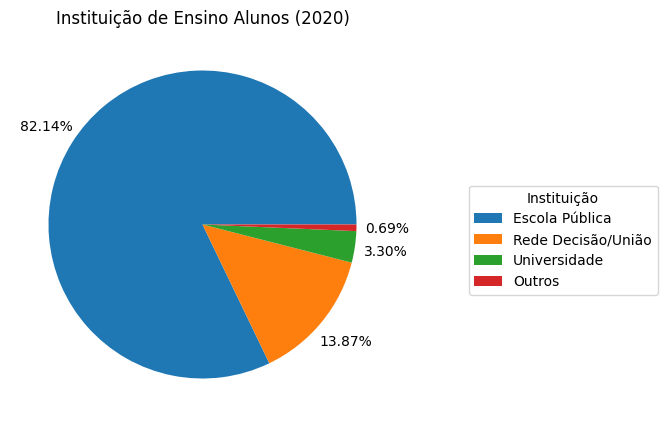

In [ ]:
#Verficando as Instituições de ensino dos alunos em 2020
fig, ax = plt.subplots(figsize=(12,5))

ax.pie(df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts(), autopct="%.2f%%", pctdistance=1.2)

ax.legend(labels= df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts().index, title="Instituição", loc="lower right", bbox_to_anchor=(1.7, 0.3))

ax.set_title("Instituição de Ensino Alunos (2020)")

plt.show()

## Idade dos Alunos no Ano de 2020

In [ ]:
df_2020.loc['D108']

KeyError: 'D108'

In [ ]:
#Idade dos Alunos na Passos

count_idade = df_2020["IDADE_ALUNO_2020"].value_counts()
axis = count_idade.plot(kind="bar", figsize=(10,5), color = "#9355a6")

plt.title("Idade dos Alunos (2020)")
plt.xlabel("Idade", size = 12)
plt.ylabel("Número de Alunos", size = 12)
plt.show()



## Verificando Nível de Defasagem dos Alunos em 2020




In [ ]:
# Convertendo os valores das colunas para strings
df_2020['IAN_2020'] = df_2020['IAN_2020'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2020['IAN_2020'] = df_2020['IAN_2020'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2020['IAN_2020'].unique())

In [ ]:
df_2020["IAN_2020"].unique()

In [ ]:
df_2020["IAN_2020"].isnull().sum()

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2020)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='IAN_2020', y=df_2020['IAN_2020'].value_counts(), df=df_2020)
df_2020 = df_2020.groupby('IAN_2020')['FASE_TURMA_2020'].count().reset_index().set_index('IAN_2020')

# Analisando os Dados em 2021

In [ ]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

In [ ]:
df_2021.shape

In [ ]:
# Convertendo os valores das colunas para strings
df_2021['IAN_2021'] = df_2021['IAN_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['IAN_2020'] = df_2021['IAN_2021'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2021['IAN_2020'].unique())

In [ ]:
df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts()

In [ ]:
#renomeando os valores da coluna instituição de ensino 2021
df_2021["INSTITUICAO_ENSINO_ALUNO_2021"] = df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].replace('Escola JP II', 'Outros')

#verificando as alterações
print(df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].unique())

In [ ]:
#Verficando as Instituições de ensino dos alunos em 2021
fig, ax = plt.subplots(figsize=(12,5))

ax.pie(df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts(), autopct="%.2f%%", pctdistance=1.2)

ax.legend(labels= df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts().index, title="Instituição", loc="lower right", bbox_to_anchor=(1.7, 0.3))

ax.set_title("Instituição de Ensino Alunos (2021)")

plt.show()

## Verificando o Nível de Defasagem em 2021

In [ ]:
# Convertendo os valores das colunas para strings
df_2021['IAN_2021'] = df_2021['IAN_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['IAN_2021'] = df_2021['IAN_2021'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2021['IAN_2021'].unique())

In [ ]:
# Convertendo os valores das colunas para strings
df_2021['FASE_2021'] = df_2021['FASE_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['FASE_2021'] = df_2021['FASE_2021'].replace({
    '1.0': 'Fase 1',
    '2.0': 'Fase 2',
    '3.0': 'Fase 3',
    '4.0': 'Fase 4',
    '5.0': 'Fase 5',
    '6.0': 'Fase 6',
    '7.0': 'Fase 7',
    '8.0': 'Fase 8',
})

# Verificando as alterações
print(df_2021['FASE_2021'].unique())

In [ ]:
df_2021["IAN_2021"].unique()

In [ ]:
df_2021["IAN_2021"].isnull().sum()

In [ ]:
df_2021["FASE_2021"].unique()

In [ ]:
#df_ian_2021 = df.groupby('IAN_2021')['FASE_2021'].count()
#df_ian_2022 = df.groupby('IAN_2022')['FASE_2022'].count()


In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2021)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='FASE_2021', y=df_2021['IAN_2021'].value_counts(), df=df_2021)
df_ian_2021 = df_2021.groupby('IAN_2021')['FASE_2021'].count().reset_index().set_index('IAN_2021')

## Analisando os Dados em 2022

## Verificando o Nível de Defasagem dos Alunos em 2022

In [ ]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022.head()

In [ ]:
df_2022.shape

In [ ]:
df_2022 = cleaning_dataset(df_2022)
df_2022.shape

In [ ]:
# Convertendo os valores das colunas para strings
df_2022['IAN_2022'] = df_2022['IAN_2022'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2022['IAN_2022'] = df_2022['IAN_2022'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2022['IAN_2022'].unique())

In [ ]:
# Convertendo os valores das colunas para strings
df_2022['FASE_2022'] = df_2022['FASE_2022'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2022['FASE_2022'] = df_2022['FASE_2022'].replace({
    '1.0': 'Fase 1',
    '2.0': 'Fase 2',
    '3.0': 'Fase 3',
    '4.0': 'Fase 4',
    '5.0': 'Fase 5',
    '6.0': 'Fase 6',
    '7.0': 'Fase 7',
    '8.0': 'Fase 8',
})

# Verificando as alterações

In [ ]:
df_2022["IAN_2022"].unique()

In [ ]:
df_2022["IAN_2022"].isnull().sum()

In [ ]:
df_2022["FASE_2022"].unique()

In [ ]:
#df_ian_2021.plot.barh(figsize=(6,4), color = 'royalblue')

#plt.ylabel('Nível de Defasagem', fontsize = 10)
#plt.xlabel('Número de Alunos', fontsize = 10)
#plt.title('Nível de Defasagem dos Alunos (2021)', fontsize = 12)

#plt.show()

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2022)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='FASE_2022', y=df_2022['IAN_2022'].value_counts(), df=df_2022)
df_ian_2022 = df_2022.groupby('IAN_2022')['FASE_2022'].count().reset_index().set_index('IAN_2022')